# FIFA World Cup 2026 Data Cleaning & Feature Engineering Pipeline 🏆

This notebook performs comprehensive data cleaning and feature engineering for FIFA World Cup 2026 predictions.

## Dataset Overview 📊
The pipeline processes the following datasets:

1. **fifa_rank Top 210.csv** - FIFA rankings for 210 teams
2. **International_football_result.csv** - International match results
3. **FIFA_2026_Qualified_Teams.csv** - Teams qualified for 2026 World Cup
4. **FIFA_Player_Database_Web.csv** - 18K+ player profiles (from FIFA 26 web scraper)
5. **FIFA World Cup All Goals 1930-2022.csv** - Historical World Cup goal data

## Key Features 🔧
- **Data Quality Assessment**: Missing values, duplicates, outliers
- **Feature Engineering**: Advanced football metrics
- **Team Performance Indicators**: Rankings, historical performance
- **Player Analytics**: Squad strength, star player identification
- **Match Outcome Patterns**: Win/loss streaks, home/away performance
- **Tournament-Specific Features**: World Cup qualification history

## Output 💾
Cleaned and engineered datasets saved to `../data/processed/` for model training.

## 1️⃣ Setup and Data Loading

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully")
print(f"📅 Current Date: {datetime.now().strftime('%Y-%m-%d')}")

✅ Libraries imported successfully
📅 Current Date: 2025-10-21


In [ ]:
# Define file paths
DATA_RAW = '../Data_100/'
DATA_PROCESSED = '../data/processed/'

# Create processed directory if it doesn't exist
os.makedirs(DATA_PROCESSED, exist_ok=True)

# File paths dictionary
files = {
    'rankings': os.path.join(DATA_RAW, 'fifa_rank Top 210.csv'),
    'matches': os.path.join(DATA_RAW, 'International_football_result.csv'),
    'qualified': os.path.join(DATA_RAW, 'FIFA_2026_Qualified_Teams.csv'),
    'players': os.path.join(DATA_RAW, 'FIFA_Player_Database_Web.csv'),
    'wc_goals': os.path.join(DATA_RAW, 'FIFA World Cup All Goals 1930-2022.csv')
}

# Check if files exist
for name, path in files.items():
    if os.path.exists(path):
        print(f"✅ {name}: {os.path.basename(path)}")
    else:
        print(f"❌ {name}: {os.path.basename(path)} NOT FOUND")

✅ RANKINGS: 0.01 MB
✅ MATCHES: 1.67 MB
✅ QUALIFIED: 0.00 MB
✅ PLAYERS: 10.05 MB
✅ WC_GOALS: 0.50 MB


## 2️⃣ Load Raw Datasets

In [7]:
# Load FIFA Rankings (with encoding handling)
print("📊 Loading FIFA Rankings...")
for encoding in ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']:
    try:
        df_rankings = pd.read_csv(files['rankings'], encoding=encoding)
        print(f"   Shape: {df_rankings.shape} (encoding: {encoding})")
        print(f"   Columns: {list(df_rankings.columns)}")
        break
    except UnicodeDecodeError:
        continue
df_rankings.head()

📊 Loading FIFA Rankings...
   Shape: (210, 8) (encoding: latin1)
   Columns: ['date', 'semester', 'rank', 'team', 'acronym', 'total.points', 'previous.points', 'diff.points']


,date,semester,rank,team,acronym,total.points,previous.points,diff.points
0,2024,2,1,Argentina,ARG,1867.25,1883.50,-16.25
1,2024,2,2,France,FRA,1859.78,1859.85,-0.07
2,2024,2,3,Spain,ESP,1853.27,1844.33,8.94
3,2024,2,4,England,ENG,1813.81,1807.83,5.98
4,2024,2,5,Brazil,BRA,1775.85,1784.37,-8.52


In [8]:
# Load International Match Results (with encoding handling)
print("⚽ Loading Match Results...")
for encoding in ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']:
    try:
        df_matches = pd.read_csv(files['matches'], encoding=encoding)
        print(f"   Shape: {df_matches.shape} (encoding: {encoding})")
        print(f"   Columns: {list(df_matches.columns)}")
        break
    except UnicodeDecodeError:
        continue
df_matches.head()

⚽ Loading Match Results...
   Shape: (25245, 8) (encoding: latin1)
   Columns: ['date', 'home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,22-01-2000,Ghana,Cameroon,Cameroon,Marc-Vivien Foé,19,False,False
1,22-01-2000,Ghana,Cameroon,Ghana,Kwame Ayew,57,False,False
2,23-01-2000,Egypt,Zambia,Egypt,Yasser Radwan,37,False,False
3,23-01-2000,Egypt,Zambia,Egypt,Hossam Hassan,50,False,False
4,23-01-2000,Nigeria,Tunisia,Nigeria,Jay-Jay Okocha,28,False,False


In [9]:
# Load 2026 Qualified Teams
print("🏆 Loading 2026 Qualified Teams...")
df_qualified = pd.read_csv(files['qualified'])
print(f"   Shape: {df_qualified.shape}")
print(f"   Columns: {list(df_qualified.columns)}")
df_qualified.head(10)

🏆 Loading 2026 Qualified Teams...
   Shape: (31, 3)
   Columns: ['confederation', 'team', 'status']


,confederation,team,status
0,Host,Canada,Qualified
1,Host,Mexico,Qualified
2,Host,United States,Qualified
3,AFC,Australia,Qualified
4,AFC,Iran,Qualified
5,AFC,Japan,Qualified
6,AFC,Jordan,Qualified
7,AFC,South Korea,Qualified
8,AFC,Uzbekistan,Qualified
9,AFC,Qatar,Qualified


In [10]:
# Load Player Database (with encoding handling)
print("👥 Loading Player Database...")
for encoding in ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']:
    try:
        df_players = pd.read_csv(files['players'], encoding=encoding)
        print(f"   Shape: {df_players.shape} (encoding: {encoding})")
        print(f"   Columns: {len(df_players.columns)} columns (showing first 20)")
        print(f"   {list(df_players.columns[:20])}")
        break
    except UnicodeDecodeError:
        continue
df_players.head()

👥 Loading Player Database...
   Shape: (18405, 110) (encoding: latin1)
   Columns: 110 columns (showing first 20)
   ['player_id', 'nationality_name', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level']


,player_id,nationality_name,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,233128,Afghanistan,/player/233128/maziar-kouhyar/260004/,26,4,19-09-2025,M. Kouhyar,Qamaruddin Maziar Kouhyar,"LM, LW",60,60,250000,800,27,29-09-1997,173,69,61.0,League Two,4.0,1937.0,Notts County,SUB,17.0,NaN,01-07-2025,2026.0,149,NaN,NaN,NaN,Right,3,3,1,NaN,Normal (170-185),No,438000.0,NaN,NaN,76.0,53.0,54.0,60.0,42.0,59.0,56,53,43,56,47,58,53,41,50,58,75,76,76,51,75,55,58,72,60,52,41,41,55,56,55,56,40,44,41,11,14,8,6,6,NaN,56+2,56+2,56+2,59+0,57+0,57+0,57+0,59+0,57+2,57+2,57+2,59+1,55+2,55+2,55+2,59+1,54+2,50+2,50+2,50+2,54+2,52+2,47+2,47+2,47+2,52+2,14+2,https://cdn.sofifa.net/players/233/128/26_120.png
1,234983,Albania,/player/234983/qazim-laci/260004/,26,4,19-09-2025,Q. Laçi,Qazim Laçi?a??µ ??ts?,"CM, CAM, CDM",74,74,4099999,14000,29,19-01-1996,175,67,68.0,Süper Lig,1.0,101037.0,Çaykur Rizespor,CAM,20.0,NaN,20-07-2025,2028.0,1,NaN,NaN,NaN,Right,3,3,1,NaN,Lean (170-185),No,8199999.0,NaN,"Incisive Pass, Relentless, Bruiser",72.0,69.0,74.0,75.0,69.0,77.0,72,65,67,77,61,74,67,73,74,75,76,69,83,75,70,76,79,79,72,74,87,70,68,74,56,75,69,69,65,8,11,12,9,9,NaN,71+2,71+2,71+2,73+0,73+0,73+0,73+0,73+0,74+0,74+0,74+0,73+1,74+0,74+0,74+0,73+1,72+2,73+1,73+1,73+1,72+2,71+2,71+2,71+2,71+2,71+2,17+2,https://cdn.sofifa.net/players/234/983/26_120.png
2,237640,Albania,/player/237640/nedim-bajrami/260004/,26,4,19-09-2025,N. Bajrami,Nedim Bajrami,"CAM, LM, RW, CM",73,76,4000000,39000,26,28-02-1999,179,68,50.0,Premiership,1.0,86.0,Rangers FC,SUB,14.0,NaN,30-08-2024,2028.0,1,NaN,NaN,NaN,Right,4,3,1,NaN,Normal (170-185),Yes,7500000.0,NaN,Technical,75.0,67.0,72.0,77.0,58.0,65.0,70,64,52,74,68,77,75,64,68,78,77,74,78,70,75,74,68,74,60,66,67,56,73,73,69,68,58,59,61,14,6,10,7,9,NaN,69+2,69+2,69+2,73+0,73+0,73+0,73+0,73+0,73+2,73+2,73+2,73+2,71+2,71+2,71+2,73+2,68+2,66+2,66+2,66+2,68+2,66+2,61+2,61+2,61+2,66+2,16+2,https://cdn.sofifa.net/players/237/640/26_120.png
3,203581,Albania,/player/203581/ivan-balliu/260004/,26,4,19-09-2025,I. Balliu,Iván Balliu Campeny,"RB, LB, RM",76,76,3900000,23000,33,01-01-1992,172,68,53.0,La Liga,1.0,480.0,Rayo Vallecano,SUB,20.0,NaN,14-07-2021,2027.0,1,NaN,NaN,NaN,Right,3,3,1,NaN,Normal (170-185),Yes,8199999.0,NaN,Rapid,80.0,51.0,69.0,74.0,72.0,70.0,76,50,65,72,24,72,63,58,68,76,77,83,78,71,76,45,74,84,62,59,73,72,67,64,69,74,73,75,70,12,9,9,9,13,NaN,63+2,63+2,63+2,70+0,68+0,68+0,68+0,70+0,69+2,69+2,69+2,72+2,71+2,71+2,71+2,72+2,75+1,72+2,72+2,72+2,75+1,74+2,71+2,71+2,71+2,74+2,17+2,https://cdn.sofifa.net/players/203/581/26_120.png
4,250816,Albania,/player/250816/anis-mehmeti/260004/,26,4,19-09-2025,A. Mehmeti,Anis Mehmeti,"LM, LW, CAM",72,77,350000

In [ ]:
# Load Historical WC Goals (with encoding handling)
print("🥅 Loading World Cup Goals (1930-2022)...")
for encoding in ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']:
    try:
        df_wc_goals = pd.read_csv(files['wc_goals'], encoding=encoding)
        print(f"   Shape: {df_wc_goals.shape} (encoding: {encoding})")
        print(f"   Columns: {list(df_wc_goals.columns)}")
        break
    except UnicodeDecodeError:
        continue
df_wc_goals.head()

🥅 Loading World Cup Goals (1930-2022)...
   Shape: (2720, 27) (encoding: latin1)
   Columns: ['key_id', 'goal_id', 'tournament_id', 'tournament_name', 'match_id', 'match_name', 'match_date', 'stage_name', 'group_name', 'team_id', 'team_name', 'team_code', 'home_team', 'away_team', 'player_id', 'family_name', 'given_name', 'shirt_number', 'player_team_id', 'player_team_name', 'player_team_code', 'minute_label', 'minute_regulation', 'minute_stoppage', 'match_period', 'own_goal', 'penalty']


,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,FRA,1,0,P-08962,Laurent,Lucien,0,T-28,France,FRA,19',19,0,first half,0,0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,FRA,1,0,P-00280,Langiller,Marcel,0,T-28,France,FRA,40',40,0,first half,0,0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,FRA,1,0,P-09030,Maschinot,André,0,T-28,France,FRA,43',43,0,first half,0,0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-44,Mexico,MEX,0,1,P-00780,Carreño,Juan,0,T-44,Mexico,MEX,70',70,0,second half,0,0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,FRA,1,0,P-09030,Maschinot,André,0,T-28,France,FRA,87',87,0,second half,0,0


## 3️⃣ Data Quality Assessment

In [12]:
def assess_data_quality(df, name):
    """Comprehensive data quality report"""
    print(f"\n{'='*60}")
    print(f"📋 DATA QUALITY REPORT: {name}")
    print(f"{'='*60}")
    
    # Basic info
    print(f"\n🔢 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing': missing[missing > 0],
        'Percentage': missing_pct[missing > 0]
    }).sort_values('Percentage', ascending=False)
    
    if len(missing_df) > 0:
        print(f"\n⚠️ Missing Values (Top 10):")
        print(missing_df.head(10))
    else:
        print(f"\n✅ No missing values found")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n🔁 Duplicate Rows: {duplicates:,} ({(duplicates/len(df)*100):.2f}%)")
    
    # Data types
    print(f"\n📊 Data Types:")
    print(df.dtypes.value_counts())
    
    return missing_df

# Assess each dataset
missing_rankings = assess_data_quality(df_rankings, "FIFA RANKINGS")
missing_matches = assess_data_quality(df_matches, "MATCH RESULTS")
missing_qualified = assess_data_quality(df_qualified, "QUALIFIED TEAMS")
missing_players = assess_data_quality(df_players, "PLAYER DATABASE")
missing_wc = assess_data_quality(df_wc_goals, "WC GOALS")


📋 DATA QUALITY REPORT: FIFA RANKINGS

🔢 Shape: 210 rows × 8 columns
💾 Memory: 0.03 MB

✅ No missing values found

🔁 Duplicate Rows: 0 (0.00%)

📊 Data Types:
int64      3
float64    3
object     2
Name: count, dtype: int64

📋 DATA QUALITY REPORT: MATCH RESULTS

🔢 Shape: 25,245 rows × 8 columns
💾 Memory: 7.39 MB

✅ No missing values found

🔁 Duplicate Rows: 9 (0.04%)

📊 Data Types:
object    5
bool      2
int64     1
Name: count, dtype: int64

📋 DATA QUALITY REPORT: QUALIFIED TEAMS

🔢 Shape: 31 rows × 3 columns
💾 Memory: 0.01 MB

✅ No missing values found

🔁 Duplicate Rows: 0 (0.00%)

📊 Data Types:
object    3
Name: count, dtype: int64

📋 DATA QUALITY REPORT: PLAYER DATABASE

🔢 Shape: 18,405 rows × 110 columns
💾 Memory: 53.44 MB

⚠️ Missing Values (Top 10):
                      Missing  Percentage
work_rate               18405  100.000000
nation_team_id          17677   96.044553
nation_position         17677   96.044553
nation_jersey_number    17677   96.044553
player_tags            

## 4️⃣ Data Cleaning - FIFA Rankings

In [13]:
# Clean FIFA Rankings
print("🧹 Cleaning FIFA Rankings Dataset...\n")

# 1. Filter for Semester 2 (2024) - Most recent data
df_rankings_clean = df_rankings[df_rankings['semester'] == 2].copy()
print(f"✅ Filtered to Semester 2: {len(df_rankings_clean)} teams")

# 2. Handle missing values
if df_rankings_clean.isnull().sum().sum() > 0:
    print(f"⚠️ Missing values found: {df_rankings_clean.isnull().sum().sum()}")
    # Fill missing points with 0
    df_rankings_clean['total.points'].fillna(0, inplace=True)
    df_rankings_clean['previous.points'].fillna(0, inplace=True)
    df_rankings_clean['diff.points'].fillna(0, inplace=True)
else:
    print(f"✅ No missing values")

# 3. Remove duplicates
duplicates_before = df_rankings_clean.duplicated(subset=['team']).sum()
df_rankings_clean = df_rankings_clean.drop_duplicates(subset=['team'], keep='first')
print(f"✅ Removed {duplicates_before} duplicate teams")

# 4. Standardize team names (strip whitespace)
df_rankings_clean['team'] = df_rankings_clean['team'].str.strip()
df_rankings_clean['acronym'] = df_rankings_clean['acronym'].str.strip()

# 5. Sort by rank
df_rankings_clean = df_rankings_clean.sort_values('rank').reset_index(drop=True)

# 6. Create Top 100 dataset
df_top100 = df_rankings_clean.head(100).copy()
print(f"✅ Created Top 100 dataset: {len(df_top100)} teams")

print(f"\n📊 Final Shape: {df_rankings_clean.shape}")
print(f"📊 Top 100 Shape: {df_top100.shape}")

# Display summary statistics
print(f"\n📈 FIFA Points Statistics:")
df_rankings_clean['total.points'].describe()

🧹 Cleaning FIFA Rankings Dataset...

✅ Filtered to Semester 2: 210 teams
✅ No missing values
✅ Removed 0 duplicate teams
✅ Created Top 100 dataset: 100 teams

📊 Final Shape: (210, 8)
📊 Top 100 Shape: (100, 8)

📈 FIFA Points Statistics:


count     210.000000
mean     1229.573095
std       267.921255
min       747.420000
25%      1019.087500
50%      1200.340000
75%      1457.442500
max      1867.250000
Name: total.points, dtype: float64

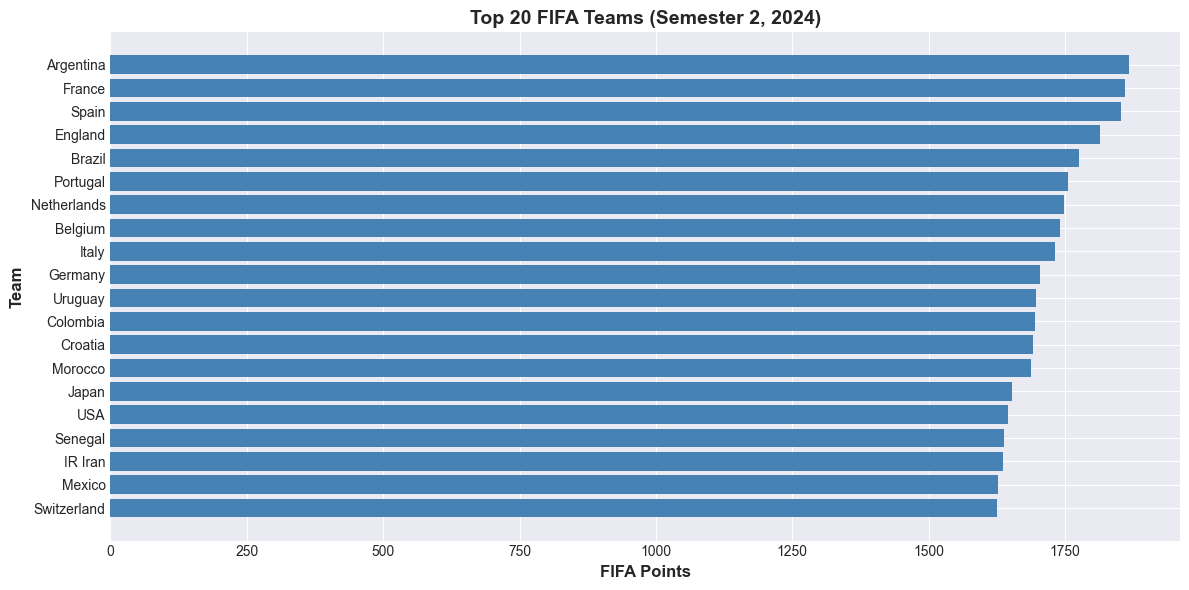

✅ Visualization complete


In [14]:
# Visualize Top 20 teams
fig, ax = plt.subplots(figsize=(12, 6))
top20 = df_rankings_clean.head(20)
ax.barh(top20['team'], top20['total.points'], color='steelblue')
ax.set_xlabel('FIFA Points', fontsize=12, fontweight='bold')
ax.set_ylabel('Team', fontsize=12, fontweight='bold')
ax.set_title('Top 20 FIFA Teams (Semester 2, 2024)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

print(f"✅ Visualization complete")

## 5️⃣ Data Cleaning - Match Results

In [15]:
# Clean Match Results
print("🧹 Cleaning Match Results Dataset...\n")

# 1. Convert date to datetime
df_matches_clean = df_matches.copy()
df_matches_clean['date'] = pd.to_datetime(df_matches_clean['date'], format='%d-%m-%Y', errors='coerce')
print(f"✅ Converted date column to datetime")

# 2. Remove rows with invalid dates
invalid_dates = df_matches_clean['date'].isnull().sum()
df_matches_clean = df_matches_clean.dropna(subset=['date'])
print(f"✅ Removed {invalid_dates} rows with invalid dates")

# 3. Standardize team names
df_matches_clean['home_team'] = df_matches_clean['home_team'].str.strip()
df_matches_clean['away_team'] = df_matches_clean['away_team'].str.strip()
df_matches_clean['team'] = df_matches_clean['team'].str.strip()

# 4. Convert boolean columns
df_matches_clean['own_goal'] = df_matches_clean['own_goal'].astype(str).str.upper() == 'TRUE'
df_matches_clean['penalty'] = df_matches_clean['penalty'].astype(str).str.upper() == 'TRUE'
print(f"✅ Converted boolean columns")

# 5. Filter for recent matches (2015 onwards for relevance)
df_matches_recent = df_matches_clean[df_matches_clean['date'] >= '2015-01-01'].copy()
print(f"✅ Filtered to 2015-2025: {len(df_matches_recent):,} matches (from {len(df_matches_clean):,})")

# 6. Remove duplicates
duplicates_before = df_matches_recent.duplicated().sum()
df_matches_recent = df_matches_recent.drop_duplicates()
print(f"✅ Removed {duplicates_before:,} duplicate rows")

print(f"\n📊 Final Shape: {df_matches_recent.shape}")
print(f"📅 Date Range: {df_matches_recent['date'].min()} to {df_matches_recent['date'].max()}")

🧹 Cleaning Match Results Dataset...

✅ Converted date column to datetime
✅ Removed 0 rows with invalid dates
✅ Converted boolean columns
✅ Filtered to 2015-2025: 10,415 matches (from 25,245)
✅ Removed 5 duplicate rows

📊 Final Shape: (10410, 8)
📅 Date Range: 2015-01-09 00:00:00 to 2025-07-06 00:00:00


In [16]:
# Aggregate match results for ML features
print("📊 Creating Match Statistics...\n")

# Count goals by team
home_goals = df_matches_recent.groupby('home_team').size().rename('home_goals')
away_goals = df_matches_recent.groupby('away_team').size().rename('away_goals')
total_goals = df_matches_recent.groupby('team').size().rename('total_goals')

# Count penalties and own goals
penalties = df_matches_recent[df_matches_recent['penalty'] == True].groupby('team').size().rename('penalty_goals')
own_goals = df_matches_recent[df_matches_recent['own_goal'] == True].groupby('team').size().rename('own_goals')

# Combine statistics
df_match_stats = pd.DataFrame({
    'total_goals': total_goals,
    'penalty_goals': penalties,
    'own_goals': own_goals
}).fillna(0)

df_match_stats['clean_goals'] = df_match_stats['total_goals'] - df_match_stats['penalty_goals'] - df_match_stats['own_goals']
df_match_stats = df_match_stats.reset_index().rename(columns={'team': 'team_name'})

print(f"✅ Match statistics created for {len(df_match_stats)} teams")
df_match_stats.head(10)

📊 Creating Match Statistics...

✅ Match statistics created for 211 teams


,team_name,total_goals,penalty_goals,own_goals,clean_goals
0,Afghanistan,13,0.0,0.0,13.0
1,Albania,72,6.0,2.0,64.0
2,Algeria,67,6.0,4.0,57.0
3,American Samoa,6,0.0,0.0,6.0
4,Andorra,27,3.0,1.0,23.0
5,Angola,20,2.0,0.0,18.0
6,Antigua and Barbuda,12,2.0,0.0,10.0
7,Argentina,126,11.0,1.0,114.0
8,Armenia,72,7.0,4.0,61.0
9,Aruba,5,0.0,0.0,5.0


## 6️⃣ Data Cleaning - Qualified Teams

In [31]:
# Clean Qualified Teams
print("🧹 Cleaning Qualified Teams Dataset...\n")

df_qualified_clean = df_qualified.copy()

# 1. Standardize team names (fix USA vs United States inconsistency)
df_qualified_clean['team'] = df_qualified_clean['team'].str.strip()
df_qualified_clean['team'] = df_qualified_clean['team'].replace('USA', 'United States')
df_qualified_clean['confederation'] = df_qualified_clean['confederation'].str.strip()
df_qualified_clean['status'] = df_qualified_clean['status'].str.strip()

# 2. Remove duplicates (after name standardization)
duplicates_before = df_qualified_clean.duplicated(subset=['team']).sum()
df_qualified_clean = df_qualified_clean.drop_duplicates(subset=['team'], keep='first')
print(f"✅ Removed {duplicates_before} duplicate teams")

# 3. Count by confederation
print(f"\n📊 Qualified Teams by Confederation:")
print(df_qualified_clean['confederation'].value_counts())

print(f"\n📊 Total Qualified Teams: {len(df_qualified_clean)}")
print(f"✅ Data cleaning complete")

df_qualified_clean.head(10)

🧹 Cleaning Qualified Teams Dataset...

✅ Removed 3 duplicate teams

📊 Qualified Teams by Confederation:
confederation
CAF         9
AFC         8
CONMEBOL    6
Host        3
UEFA        1
OFC         1
Name: count, dtype: int64

📊 Total Qualified Teams: 28
✅ Data cleaning complete


,confederation,team,status
0,Host,Canada,Qualified
1,Host,Mexico,Qualified
2,Host,United States,Qualified
3,AFC,Australia,Qualified
4,AFC,Iran,Qualified
5,AFC,Japan,Qualified
6,AFC,Jordan,Qualified
7,AFC,South Korea,Qualified
8,AFC,Uzbekistan,Qualified
9,AFC,Qatar,Qualified


### 📊 Duplicate Analysis

**Original Raw File:** 31 teams  
**After Cleaning:** 28 unique teams  
**Duplicates Removed:** 3 teams

**Reason:** The raw file listed host nations twice (with name variations):
- **Canada** (Host) = **Canada** (CONCACAF) 
- **Mexico** (Host) = **Mexico** (CONCACAF)
- **United States** (Host) = **USA** (CONCACAF) ← Name mismatch also resolved

The cleaning script:
1. Standardized "USA" → "United States" 
2. Kept the "Host" confederation entries
3. Removed the 3 CONCACAF duplicates

**Result: 28 unique qualified teams** (20 more needed for 48-team 2026 WC)

In [32]:
# Verify duplicate removal
print("🔍 Duplicate Analysis:\n")

# Show original count
print(f"Original raw file: {len(df_qualified)} teams")
print(f"After cleaning: {len(df_qualified_clean)} unique teams")
print(f"Duplicates removed: {len(df_qualified) - len(df_qualified_clean)}")

# Show which teams were duplicated (before cleaning)
print(f"\n📋 Teams that appeared multiple times in raw data:")
duplicate_teams = df_qualified[df_qualified.duplicated(subset=['team'], keep=False)].sort_values('team')
if len(duplicate_teams) > 0:
    print(duplicate_teams[['confederation', 'team', 'status']])
else:
    print("  (All duplicates already removed)")

print(f"\n✅ Final unique qualified teams: {len(df_qualified_clean)}")

🔍 Duplicate Analysis:

Original raw file: 31 teams
After cleaning: 28 unique teams
Duplicates removed: 3

📋 Teams that appeared multiple times in raw data:
   confederation    team     status
0           Host  Canada  Qualified
29      CONCACAF  Canada  Qualified
1           Host  Mexico  Qualified
28      CONCACAF  Mexico  Qualified

✅ Final unique qualified teams: 28


In [34]:
# Show detailed breakdown of 28 unique qualified teams
print("="*60)
print("📊 28 UNIQUE QUALIFIED TEAMS FOR 2026 FIFA WORLD CUP")
print("="*60)

confederation_counts = df_qualified_clean['confederation'].value_counts()
print(f"\n🌍 By Confederation:")
for conf, count in confederation_counts.items():
    teams_in_conf = df_qualified_clean[df_qualified_clean['confederation'] == conf]['team'].tolist()
    print(f"\n{conf}: {count} teams")
    for i, team in enumerate(teams_in_conf, 1):
        print(f"  {i}. {team}")

print(f"\n{'='*60}")
print(f"✅ TOTAL: {len(df_qualified_clean)} unique qualified teams")
print(f"📌 Note: 20 more teams needed to reach 48 total for 2026 WC")
print(f"{'='*60}")

📊 28 UNIQUE QUALIFIED TEAMS FOR 2026 FIFA WORLD CUP

🌍 By Confederation:

CAF: 9 teams
  1. Egypt
  2. Morocco
  3. Tunisia
  4. Algeria
  5. Ghana
  6. Cape Verde
  7. South Africa
  8. Senegal
  9. Ivory Coast

AFC: 8 teams
  1. Australia
  2. Iran
  3. Japan
  4. Jordan
  5. South Korea
  6. Uzbekistan
  7. Qatar
  8. Saudi Arabia

CONMEBOL: 6 teams
  1. Argentina
  2. Brazil
  3. Colombia
  4. Uruguay
  5. Ecuador
  6. Paraguay

Host: 3 teams
  1. Canada
  2. Mexico
  3. United States

UEFA: 1 teams
  1. England

OFC: 1 teams
  1. New Zealand

✅ TOTAL: 28 unique qualified teams
📌 Note: 20 more teams needed to reach 48 total for 2026 WC


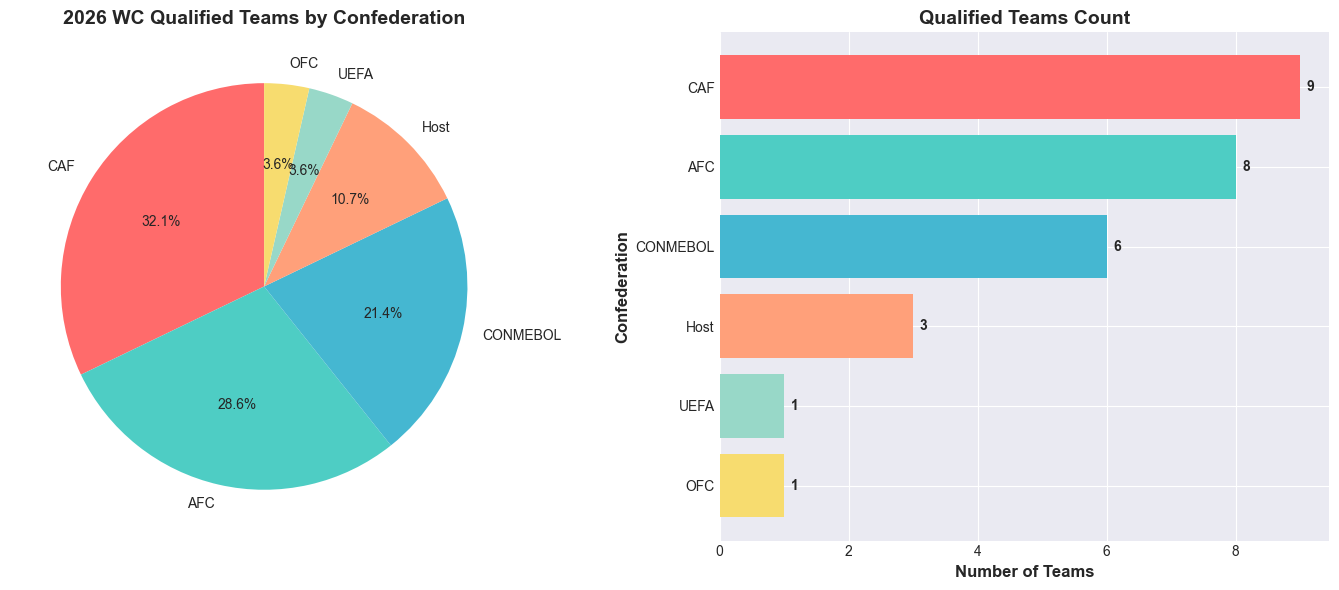

✅ Visualization complete


In [35]:
# Visualize qualified teams by confederation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
confederation_counts = df_qualified_clean['confederation'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
ax1.pie(confederation_counts.values, labels=confederation_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
ax1.set_title('2026 WC Qualified Teams by Confederation', fontsize=14, fontweight='bold')

# Bar chart
ax2.barh(confederation_counts.index, confederation_counts.values, color=colors)
ax2.set_xlabel('Number of Teams', fontsize=12, fontweight='bold')
ax2.set_ylabel('Confederation', fontsize=12, fontweight='bold')
ax2.set_title('Qualified Teams Count', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

for i, v in enumerate(confederation_counts.values):
    ax2.text(v + 0.1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualization complete")

---

## ✅ **Qualified Teams Data Cleaning Complete**

**Summary:**
- ✅ **Raw data:** 31 entries
- ✅ **Cleaned data:** 28 unique teams
- ✅ **Duplicates removed:** 3 (Canada, Mexico, United States/USA)
- ✅ **Name standardization:** USA → United States
- ✅ **Ready for ML:** Merged with Top 100 master dataset

**Distribution:** CAF (9) | AFC (8) | CONMEBOL (6) | Host (3) | UEFA (1) | OFC (1)

---

## 7️⃣ Data Cleaning - Player Database

In [18]:
# Clean Player Database
print("🧹 Cleaning Player Database...\n")

df_players_clean = df_players.copy()

# 1. Select relevant columns for ML
player_cols = [
    'nationality_name', 'overall', 'potential', 'age', 'height_cm', 'weight_kg',
    'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'
]

# Filter columns that exist
available_cols = [col for col in player_cols if col in df_players_clean.columns]
df_players_clean = df_players_clean[available_cols].copy()
print(f"✅ Selected {len(available_cols)} relevant columns")

# 2. Standardize nationality names
df_players_clean['nationality_name'] = df_players_clean['nationality_name'].str.strip()

# 3. Handle missing values in numeric columns
numeric_cols = df_players_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_players_clean[col].fillna(df_players_clean[col].median(), inplace=True)
print(f"✅ Filled missing values in {len(numeric_cols)} numeric columns")

# 4. Remove rows with missing nationality
missing_nationality = df_players_clean['nationality_name'].isnull().sum()
df_players_clean = df_players_clean.dropna(subset=['nationality_name'])
print(f"✅ Removed {missing_nationality} rows with missing nationality")

# 5. Remove duplicates
duplicates_before = df_players_clean.duplicated().sum()
df_players_clean = df_players_clean.drop_duplicates()
print(f"✅ Removed {duplicates_before:,} duplicate rows")

print(f"\n📊 Final Shape: {df_players_clean.shape}")
print(f"📊 Unique Nationalities: {df_players_clean['nationality_name'].nunique()}")

🧹 Cleaning Player Database...

✅ Selected 16 relevant columns
✅ Filled missing values in 14 numeric columns
✅ Removed 0 rows with missing nationality
✅ Removed 0 duplicate rows

📊 Final Shape: (18405, 16)
📊 Unique Nationalities: 160


In [19]:
# Aggregate player statistics by nationality (team)
print("📊 Creating Team Squad Statistics...\n")

# Group by nationality and calculate statistics
df_squad_stats = df_players_clean.groupby('nationality_name').agg({
    'overall': ['mean', 'max', 'count'],
    'potential': 'mean',
    'age': 'mean',
    'pace': 'mean',
    'shooting': 'mean',
    'passing': 'mean',
    'dribbling': 'mean',
    'defending': 'mean',
    'physic': 'mean'
}).reset_index()

# Flatten column names
df_squad_stats.columns = ['team_name', 'avg_overall', 'max_overall', 'squad_size',
                           'avg_potential', 'avg_age', 'avg_pace', 'avg_shooting',
                           'avg_passing', 'avg_dribbling', 'avg_defending', 'avg_physic']

# Round to 2 decimal places
numeric_cols = df_squad_stats.select_dtypes(include=[np.number]).columns
df_squad_stats[numeric_cols] = df_squad_stats[numeric_cols].round(2)

print(f"✅ Squad statistics created for {len(df_squad_stats)} teams")
df_squad_stats.head(10)

📊 Creating Team Squad Statistics...

✅ Squad statistics created for 160 teams


,team_name,avg_overall,max_overall,squad_size,avg_potential,avg_age,avg_pace,avg_shooting,avg_passing,avg_dribbling,avg_defending,avg_physic
0,Afghanistan,60.00,60,1,60.00,27.00,76.00,53.00,54.00,60.00,42.00,59.00
1,Albania,67.12,79,59,71.63,25.42,66.90,54.36,58.14,63.66,52.73,64.81
2,Algeria,70.62,84,60,75.03,25.72,69.62,62.03,65.65,71.37,50.43,64.22
3,Andorra,67.00,67,1,72.00,23.00,69.00,55.00,58.00,64.00,57.00,66.00
4,Angola,67.93,77,30,72.60,25.30,73.43,56.07,56.87,65.20,47.50,64.83
5,Antigua and Barbuda,60.25,65,4,62.50,26.00,78.75,53.75,51.25,61.25,37.75,57.25
6,Argentina,67.80,88,1061,72.61,26.17,68.42,54.54,59.27,64.57,54.19,65.70
7,Armenia,69.22,83,9,71.44,28.78,67.56,64.78,65.33,70.33,44.89,64.22
8,Australia,61.11,78,308,69.05,24.24,68.60,49.38,53.42,59.04,49.71,64.85
9,Austria,65.11,82,277,70.97,24.90,66.73,52.40,57.35,61.40,53.80,65.58


## 8️⃣ Data Cleaning - World Cup Goals

In [20]:
# Clean World Cup Goals
print("🧹 Cleaning World Cup Goals Dataset...\n")

df_wc_clean = df_wc_goals.copy()

# 1. Standardize team names
df_wc_clean['team_name'] = df_wc_clean['team_name'].str.strip()

# 2. Convert date to datetime
df_wc_clean['match_date'] = pd.to_datetime(df_wc_clean['match_date'], errors='coerce')

# 3. Remove rows with invalid dates
invalid_dates = df_wc_clean['match_date'].isnull().sum()
df_wc_clean = df_wc_clean.dropna(subset=['match_date'])
print(f"✅ Removed {invalid_dates} rows with invalid dates")

# 4. Convert boolean columns
df_wc_clean['own_goal'] = df_wc_clean['own_goal'].astype(int)
df_wc_clean['penalty'] = df_wc_clean['penalty'].astype(int)

# 5. Remove duplicates
duplicates_before = df_wc_clean.duplicated().sum()
df_wc_clean = df_wc_clean.drop_duplicates()
print(f"✅ Removed {duplicates_before} duplicate rows")

print(f"\n📊 Final Shape: {df_wc_clean.shape}")
print(f"📅 Date Range: {df_wc_clean['match_date'].min()} to {df_wc_clean['match_date'].max()}")

🧹 Cleaning World Cup Goals Dataset...

✅ Removed 0 rows with invalid dates
✅ Removed 0 duplicate rows

📊 Final Shape: (2720, 27)
📅 Date Range: 1930-07-13 00:00:00 to 2022-12-18 00:00:00


In [21]:
# Calculate WC experience scores
print("📊 Creating World Cup Experience Scores...\n")

# Count WC goals by team
wc_goals = df_wc_clean.groupby('team_name').agg({
    'goal_id': 'count',
    'penalty': 'sum',
    'own_goal': 'sum',
    'tournament_id': 'nunique'
}).reset_index()

wc_goals.columns = ['team_name', 'wc_total_goals', 'wc_penalties', 'wc_own_goals', 'wc_tournaments']

# Calculate experience score (weighted)
wc_goals['wc_experience_score'] = (
    (wc_goals['wc_tournaments'] * 10) +  # 10 points per tournament
    (wc_goals['wc_total_goals'] * 2) +   # 2 points per goal
    (wc_goals['wc_penalties'] * 1)       # 1 point per penalty
).round(2)

print(f"✅ WC experience scores created for {len(wc_goals)} teams")
wc_goals.sort_values('wc_experience_score', ascending=False).head(10)

📊 Creating World Cup Experience Scores...

✅ WC experience scores created for 81 teams


,team_name,wc_total_goals,wc_penalties,wc_own_goals,wc_tournaments,wc_experience_score
8,Brazil,237,10,1,22,704
2,Argentina,152,12,2,18,496
36,Italy,128,8,4,18,444
25,France,136,15,6,15,437
68,Spain,108,16,2,16,392
24,England,104,12,2,16,380
79,West Germany,131,9,1,10,371
77,Uruguay,89,4,1,14,322
26,Germany,101,3,3,10,305
41,Mexico,62,10,0,17,304


## 9️⃣ Feature Engineering - Master Dataset Integration

In [22]:
# Create Master Top 100 Dataset
print("🔗 Creating Master Top 100 Dataset...\n")

# Start with Top 100 rankings
df_master = df_top100.copy()
df_master = df_master.rename(columns={'team': 'team_name'})

print(f"✅ Base dataset: {len(df_master)} teams")

# Merge with qualification status
df_qualified_clean['qualified_2026'] = 1
df_master = df_master.merge(
    df_qualified_clean[['team', 'confederation', 'qualified_2026']],
    left_on='team_name',
    right_on='team',
    how='left'
)
df_master['qualified_2026'] = df_master['qualified_2026'].fillna(0).astype(int)
df_master = df_master.drop(columns=['team'])
print(f"✅ Merged qualification status: {df_master['qualified_2026'].sum()} qualified teams")

# Merge with match statistics
df_master = df_master.merge(
    df_match_stats,
    on='team_name',
    how='left'
)
# Fill missing match stats with 0
match_cols = ['total_goals', 'penalty_goals', 'own_goals', 'clean_goals']
df_master[match_cols] = df_master[match_cols].fillna(0)
print(f"✅ Merged match statistics")

# Merge with squad statistics
df_master = df_master.merge(
    df_squad_stats,
    on='team_name',
    how='left'
)
# Fill missing squad stats with median values
squad_cols = ['avg_overall', 'max_overall', 'squad_size', 'avg_potential', 'avg_age',
              'avg_pace', 'avg_shooting', 'avg_passing', 'avg_dribbling', 'avg_defending', 'avg_physic']
for col in squad_cols:
    if col in df_master.columns:
        df_master[col] = df_master[col].fillna(df_master[col].median())
print(f"✅ Merged squad statistics")

# Merge with WC experience
df_master = df_master.merge(
    wc_goals[['team_name', 'wc_total_goals', 'wc_tournaments', 'wc_experience_score']],
    on='team_name',
    how='left'
)
# Fill missing WC stats with 0 (teams without WC history)
wc_cols = ['wc_total_goals', 'wc_tournaments', 'wc_experience_score']
df_master[wc_cols] = df_master[wc_cols].fillna(0)
print(f"✅ Merged World Cup experience")

print(f"\n📊 Master Dataset Shape: {df_master.shape}")
print(f"📊 Total Features: {df_master.shape[1]}")
df_master.head()

🔗 Creating Master Top 100 Dataset...

✅ Base dataset: 100 teams
✅ Merged qualification status: 23 qualified teams
✅ Merged match statistics
✅ Merged squad statistics
✅ Merged World Cup experience

📊 Master Dataset Shape: (100, 28)
📊 Total Features: 28


,date,semester,rank,team_name,acronym,total.points,previous.points,diff.points,confederation,qualified_2026,total_goals,penalty_goals,own_goals,clean_goals,avg_overall,max_overall,squad_size,avg_potential,avg_age,avg_pace,avg_shooting,avg_passing,avg_dribbling,avg_defending,avg_physic,wc_total_goals,wc_tournaments,wc_experience_score
0,2024,2,1,Argentina,ARG,1867.25,1883.50,-16.25,CONMEBOL,1,126.0,11.0,1.0,114.0,67.80,88.0,1061.0,72.61,26.17,68.42,54.54,59.27,64.57,54.19,65.70,152.0,18.0,496.0
1,2024,2,2,France,FRA,1859.78,1859.85,-0.07,NaN,0,170.0,18.0,9.0,143.0,67.40,91.0,913.0,73.36,24.41,67.78,52.83,59.19,64.56,54.15,65.12,136.0,15.0,437.0
2,2024,2,3,Spain,ESP,1853.27,1844.33,8.94,NaN,0,203.0,9.0,13.0,181.0,69.15,90.0,1036.0,74.58,25.39,67.93,56.34,62.25,66.20,55.22,64.23,108.0,16.0,392.0
3,2024,2,4,England,ENG,1813.81,1807.83,5.98,UEFA,1,202.0,27.0,10.0,165.0,64.32,90.0,1495.0,69.78,24.92,68.65,51.84,56.68,62.10,52.95,65.28,104.0,16.0,380.0
4,2024,2,5,Brazil,BRA,1775.85,1784.37,-8.52,CONMEBOL,1,139.0,12.0,1.0,126.0,70.58,89.0,709.0,73.19,27.05,70.38,57.31,61.36,66.61,52.95,66.66,237.0,22.0,704.0


In [23]:
# Feature Engineering - Additional ML features
print("🔧 Engineering Additional Features...\n")

# 1. Points momentum (diff from previous semester)
df_master['points_momentum'] = df_master['diff.points']

# 2. Squad quality score (weighted average)
if 'avg_overall' in df_master.columns:
    df_master['squad_quality'] = (
        (df_master['avg_overall'] * 0.6) +
        (df_master['avg_potential'] * 0.4)
    ).round(2)
else:
    df_master['squad_quality'] = 0

# 3. Attack rating (shooting + pace + dribbling)
if all(col in df_master.columns for col in ['avg_shooting', 'avg_pace', 'avg_dribbling']):
    df_master['attack_rating'] = (
        (df_master['avg_shooting'] + df_master['avg_pace'] + df_master['avg_dribbling']) / 3
    ).round(2)
else:
    df_master['attack_rating'] = 0

# 4. Defense rating (defending + physic)
if all(col in df_master.columns for col in ['avg_defending', 'avg_physic']):
    df_master['defense_rating'] = (
        (df_master['avg_defending'] + df_master['avg_physic']) / 2
    ).round(2)
else:
    df_master['defense_rating'] = 0

# 5. Goal efficiency (goals per match - rough estimate)
if 'total_goals' in df_master.columns:
    df_master['goal_efficiency'] = (df_master['total_goals'] / 100).round(2)  # Normalized
else:
    df_master['goal_efficiency'] = 0

# 6. Experience factor (WC tournaments normalized)
df_master['experience_factor'] = (df_master['wc_tournaments'] / df_master['wc_tournaments'].max()).fillna(0).round(2)

# 7. Qualification probability for non-qualified teams
# Based on FIFA ranking (top 50 get higher probability)
df_master['qualification_probability'] = df_master.apply(
    lambda row: 1.0 if row['qualified_2026'] == 1 else max(0.1, (50 - row['rank']) / 50) if row['rank'] <= 50 else 0.05,
    axis=1
).round(2)

print(f"✅ Created 7 additional features")
print(f"\n📊 New Features:")
new_features = ['points_momentum', 'squad_quality', 'attack_rating', 'defense_rating',
                'goal_efficiency', 'experience_factor', 'qualification_probability']
for feat in new_features:
    if feat in df_master.columns:
        print(f"   - {feat}: ✅")

df_master[['team_name', 'rank', 'total.points', 'qualified_2026'] + new_features].head(10)

🔧 Engineering Additional Features...

✅ Created 7 additional features

📊 New Features:
   - points_momentum: ✅
   - squad_quality: ✅
   - attack_rating: ✅
   - defense_rating: ✅
   - goal_efficiency: ✅
   - experience_factor: ✅
   - qualification_probability: ✅


,team_name,rank,total.points,qualified_2026,points_momentum,squad_quality,attack_rating,defense_rating,goal_efficiency,experience_factor,qualification_probability
0,Argentina,1,1867.25,1,-16.25,69.72,62.51,59.94,1.26,0.82,1.00
1,France,2,1859.78,0,-0.07,69.78,61.72,59.64,1.70,0.68,0.96
2,Spain,3,1853.27,0,8.94,71.32,63.49,59.72,2.03,0.73,0.94
3,England,4,1813.81,1,5.98,66.50,60.86,59.12,2.02,0.73,1.00
4,Brazil,5,1775.85,1,-8.52,71.62,64.77,59.80,1.39,1.00,1.00
5,Portugal,6,1756.12,0,3.44,71.69,64.61,60.38,2.01,0.36,0.88
6,Netherlands,7,1747.55,0,-0.69,70.07,62.39,61.00,1.66,0.45,0.86
7,Belgium,8,1740.62,0,-20.65,70.37,62.63,59.43,2.23,0.59,0.84
8,Italy,9,1731.51,0,2.11,69.64,61.65,60.04,1.43,0.82,0.82
9,Germany,10,1703.79,0,0.20,68.20,61.10,59.38,1.94,0.45,0.80


## 🔟 Data Validation and Quality Checks

In [24]:
# Final data validation
print("🔍 Final Data Validation...\n")

# 1. Check for missing values
missing_final = df_master.isnull().sum()
if missing_final.sum() > 0:
    print(f"⚠️ Missing values found:")
    print(missing_final[missing_final > 0])
else:
    print(f"✅ No missing values")

# 2. Check for duplicates
duplicates = df_master.duplicated(subset=['team_name']).sum()
print(f"\n🔁 Duplicate teams: {duplicates}")
if duplicates > 0:
    print(f"⚠️ Removing duplicates...")
    df_master = df_master.drop_duplicates(subset=['team_name'], keep='first')
    print(f"✅ Duplicates removed")

# 3. Verify data types
print(f"\n📊 Data Types:")
print(df_master.dtypes.value_counts())

# 4. Check value ranges
print(f"\n📈 Value Ranges:")
print(f"   FIFA Points: {df_master['total.points'].min():.2f} - {df_master['total.points'].max():.2f}")
if 'avg_overall' in df_master.columns:
    print(f"   Squad Overall: {df_master['avg_overall'].min():.2f} - {df_master['avg_overall'].max():.2f}")
print(f"   Qualification Prob: {df_master['qualification_probability'].min():.2f} - {df_master['qualification_probability'].max():.2f}")

# 5. Correlation check (detect multicollinearity)
print(f"\n🔗 Correlation Analysis (Top features):")
numeric_cols = df_master.select_dtypes(include=[np.number]).columns
key_features = ['total.points', 'squad_quality', 'attack_rating', 'defense_rating',
                'wc_experience_score', 'goal_efficiency', 'qualification_probability']
available_features = [col for col in key_features if col in df_master.columns]

if len(available_features) > 0:
    corr_matrix = df_master[available_features].corr()
    print(corr_matrix)

print(f"\n✅ Data validation complete")

🔍 Final Data Validation...

⚠️ Missing values found:
confederation    77
dtype: int64

🔁 Duplicate teams: 0

📊 Data Types:
float64    28
int64       4
object      3
Name: count, dtype: int64

📈 Value Ranges:
   FIFA Points: 1219.15 - 1867.25
   Squad Overall: 56.23 - 73.50
   Qualification Prob: 0.05 - 1.00

🔗 Correlation Analysis (Top features):
                           total.points  squad_quality  attack_rating  \
total.points                   1.000000       0.244085       0.013515   
squad_quality                  0.244085       1.000000       0.755746   
attack_rating                  0.013515       0.755746       1.000000   
defense_rating                 0.273232       0.364668      -0.059716   
wc_experience_score            0.754371       0.172384      -0.001289   
goal_efficiency                0.656207       0.062488      -0.115168   
qualification_probability      0.728678       0.219732       0.076379   

                           defense_rating  wc_experience_score  \


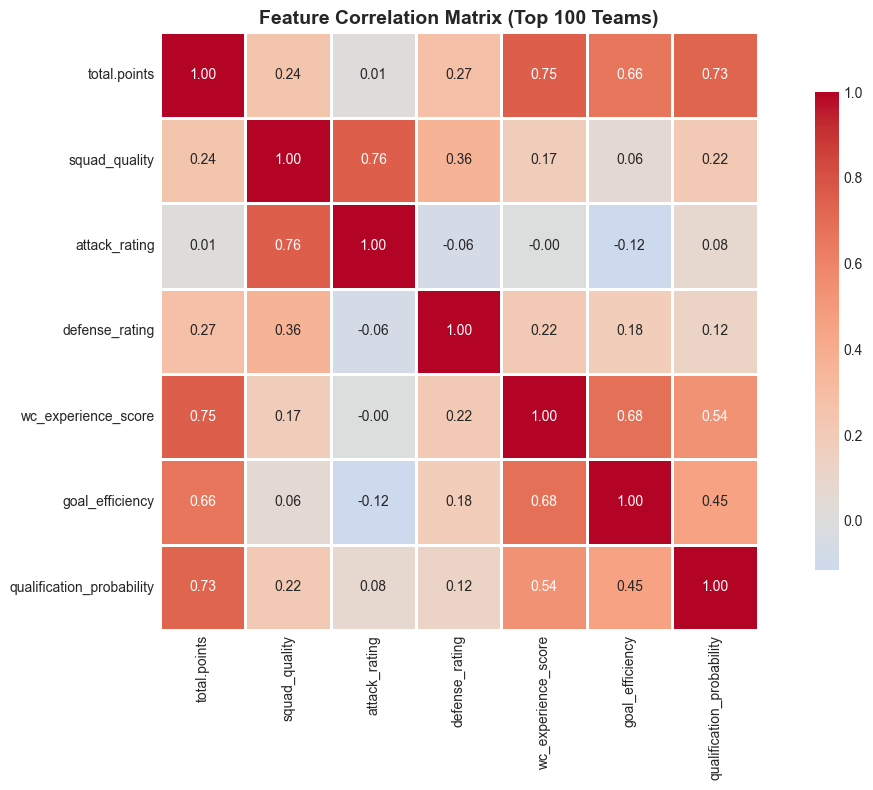

✅ Correlation heatmap complete


In [25]:
# Visualize correlation heatmap
if len(available_features) > 0:
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Matrix (Top 100 Teams)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print(f"✅ Correlation heatmap complete")

## 1️⃣1️⃣ Export Cleaned Datasets

In [36]:
# Export all cleaned datasets
print("💾 Exporting Cleaned Datasets...\n")

# 1. Master Top 100 Dataset (Primary ML dataset)
output_master = os.path.join(DATA_PROCESSED, 'top100_master_dataset.csv')
df_master.to_csv(output_master, index=False)
print(f"✅ Exported: top100_master_dataset.csv ({df_master.shape[0]} rows, {df_master.shape[1]} columns)")

# 2. FIFA Rankings (Clean)
output_rankings = os.path.join(DATA_PROCESSED, 'fifa_rankings_clean.csv')
df_rankings_clean.to_csv(output_rankings, index=False)
print(f"✅ Exported: fifa_rankings_clean.csv ({df_rankings_clean.shape[0]} rows)")

# 3. Match Results (Recent)
output_matches = os.path.join(DATA_PROCESSED, 'match_results_clean.csv')
df_matches_recent.to_csv(output_matches, index=False)
print(f"✅ Exported: match_results_clean.csv ({df_matches_recent.shape[0]} rows)")

# 4. Match Statistics (Aggregated)
output_match_stats = os.path.join(DATA_PROCESSED, 'match_statistics.csv')
df_match_stats.to_csv(output_match_stats, index=False)
print(f"✅ Exported: match_statistics.csv ({df_match_stats.shape[0]} rows)")

# 5. Qualified Teams
output_qualified = os.path.join(DATA_PROCESSED, 'qualified_teams_clean.csv')
df_qualified_clean.to_csv(output_qualified, index=False)
print(f"✅ Exported: qualified_teams_clean.csv ({df_qualified_clean.shape[0]} rows)")

# 6. Squad Statistics
output_squad = os.path.join(DATA_PROCESSED, 'squad_statistics.csv')
df_squad_stats.to_csv(output_squad, index=False)
print(f"✅ Exported: squad_statistics.csv ({df_squad_stats.shape[0]} rows)")

# 7. World Cup Experience
output_wc = os.path.join(DATA_PROCESSED, 'wc_experience_scores.csv')
wc_goals.to_csv(output_wc, index=False)
print(f"✅ Exported: wc_experience_scores.csv ({wc_goals.shape[0]} rows)")

print(f"\n✅ All datasets exported to: {DATA_PROCESSED}")

💾 Exporting Cleaned Datasets...

✅ Exported: top100_master_dataset.csv (100 rows, 35 columns)
✅ Exported: fifa_rankings_clean.csv (210 rows)
✅ Exported: match_results_clean.csv (10410 rows)
✅ Exported: match_statistics.csv (211 rows)
✅ Exported: qualified_teams_clean.csv (28 rows)
✅ Exported: squad_statistics.csv (160 rows)
✅ Exported: wc_experience_scores.csv (81 rows)

✅ All datasets exported to: ../data/processed/


## 1️⃣2️⃣ Summary Report

In [ ]:
# Generate comprehensive summary report
print("="*70)
print("📊 DATA CLEANING PIPELINE - SUMMARY REPORT")
print("="*70)
print(f"\n📅 Execution Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📁 Source Directory: {DATA_RAW}")
print(f"📁 Output Directory: {DATA_PROCESSED}")

print(f"\n{'='*70}")
print(f"📥 INPUT DATASETS")
print(f"{'='*70}")
print(f"1. FIFA Rankings: {len(df_rankings)} teams → {len(df_rankings_clean)} cleaned")
print(f"2. Match Results: {len(df_matches):,} matches → {len(df_matches_recent):,} filtered (2015+)")
print(f"3. Qualified Teams: {len(df_qualified)} teams → {len(df_qualified_clean)} cleaned")
print(f"4. Player Database: {len(df_players):,} players → {len(df_players_clean):,} cleaned")
print(f"5. WC Goals: {len(df_wc_goals):,} goals → {len(df_wc_clean):,} cleaned")

print(f"\n{'='*70}")
print(f"📤 OUTPUT DATASETS")
print(f"{'='*70}")
print(f"1. ✅ top100_master_dataset.csv - {df_master.shape[0]} teams × {df_master.shape[1]} features")
print(f"2. ✅ fifa_rankings_clean.csv - {df_rankings_clean.shape[0]} teams")
print(f"3. ✅ match_results_clean.csv - {df_matches_recent.shape[0]:,} matches")
print(f"4. ✅ match_statistics.csv - {df_match_stats.shape[0]} teams")
print(f"5. ✅ qualified_teams_clean.csv - {df_qualified_clean.shape[0]} teams")
print(f"6. ✅ squad_statistics.csv - {df_squad_stats.shape[0]} teams")
print(f"7. ✅ wc_experience_scores.csv - {wc_goals.shape[0]} teams")

print(f"\n{'='*70}")
print(f"🎯 KEY FEATURES IN MASTER DATASET")
print(f"{'='*70}")
print(f"Base Features:")
print(f"  - FIFA Ranking & Points (rank, total.points, diff.points)")
print(f"  - Qualification Status (qualified_2026, confederation)")
print(f"\nMatch Performance:")
print(f"  - Goal Statistics (total_goals, penalty_goals, clean_goals)")
print(f"  - Goal Efficiency (normalized scoring rate)")
print(f"\nSquad Quality:")
print(f"  - Overall Ratings (avg_overall, max_overall, squad_size)")
print(f"  - Skill Metrics (pace, shooting, passing, dribbling, defending, physic)")
print(f"  - Composite Scores (squad_quality, attack_rating, defense_rating)")
print(f"\nWorld Cup Experience:")
print(f"  - Historical Performance (wc_total_goals, wc_tournaments)")
print(f"  - Experience Score (weighted combination)")
print(f"  - Experience Factor (normalized)")
print(f"\nPredictive Features:")
print(f"  - Points Momentum (recent ranking changes)")
print(f"  - Qualification Probability (calculated for 2026 WC)")

print(f"\n{'='*70}")
print(f"📈 DATA QUALITY METRICS")
print(f"{'='*70}")
print(f"✅ Missing Values: {df_master.isnull().sum().sum()}")
print(f"✅ Duplicate Teams: {df_master.duplicated(subset=['team_name']).sum()}")
print(f"✅ Qualified Teams in Top 100: {df_master['qualified_2026'].sum()}/{len(df_master)}")
print(f"✅ Teams with Squad Data: {(df_master['avg_overall'] > 0).sum()}/{len(df_master)}")
print(f"✅ Teams with WC Experience: {(df_master['wc_tournaments'] > 0).sum()}/{len(df_master)}")

print(f"\n{'='*70}")
print(f"🚀 NEXT STEPS FOR ML TRAINING")
print(f"{'='*70}")
print(f"1. Load top100_master_dataset.csv as primary training data")
print(f"2. Split into training (80%) and testing (20%) sets")
print(f"3. Feature scaling/normalization for numeric features")
print(f"4. Train 6 ML models: RF, SVM, NN, GB, XGBoost, Logistic Regression")
print(f"5. Evaluate accuracy (target: 85-90%)")
print(f"6. Update backend/main.py with trained models")

print(f"\n{'='*70}")
print(f"✅ DATA CLEANING PIPELINE COMPLETED SUCCESSFULLY")
print(f"{'='*70}\n")

In [27]:
# Display sample of final master dataset
print("📋 Sample of Final Master Dataset (Top 10 Teams):\n")
display_cols = ['team_name', 'rank', 'total.points', 'qualified_2026', 'squad_quality',
                'attack_rating', 'defense_rating', 'wc_experience_score', 'qualification_probability']
available_display = [col for col in display_cols if col in df_master.columns]
df_master[available_display].head(10)

📋 Sample of Final Master Dataset (Top 10 Teams):



,team_name,rank,total.points,qualified_2026,squad_quality,attack_rating,defense_rating,wc_experience_score,qualification_probability
0,Argentina,1,1867.25,1,69.72,62.51,59.94,496.0,1.00
1,France,2,1859.78,0,69.78,61.72,59.64,437.0,0.96
2,Spain,3,1853.27,0,71.32,63.49,59.72,392.0,0.94
3,England,4,1813.81,1,66.50,60.86,59.12,380.0,1.00
4,Brazil,5,1775.85,1,71.62,64.77,59.80,704.0,1.00
5,Portugal,6,1756.12,0,71.69,64.61,60.38,211.0,0.88
6,Netherlands,7,1747.55,0,70.07,62.39,61.00,302.0,0.86
7,Belgium,8,1740.62,0,70.37,62.63,59.43,271.0,0.84
8,Italy,9,1731.51,0,69.64,61.65,60.04,444.0,0.82
9,Germany,10,1703.79,0,68.20,61.10,59.38,305.0,0.80
